Dataset Preview:
        id  Gender  Age       City Profession  Academic_Pressure  \
0  116782    Male   23     Bhopal    Student                  5   
1   28324    Male   33       Pune    Student                  3   
2   97624  Female   19     Nashik    Student                  4   
3  122053    Male   25    Chennai    Student                  3   
4   67402    Male   32  Bangalore    Student                  5   

   Work_Pressure  CGPA  Study_Satisfaction  Job_Satisfaction  \
0              0  8.74                   2                 0   
1              0  7.88                   4                 0   
2              0  5.45                   1                 0   
3              0  7.74                   1                 0   
4              0  9.96                   1                 0   

      Sleep_Duration Dietary_Habits    Degree  \
0          7-8 hours      Unhealthy      B.Ed   
1          5-6 hours       Moderate       PhD   
2  More than 8 hours      Unhealthy  Class 12  

C:\Users\danie\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:25:58] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8335

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1666
           1       0.84      0.88      0.86      2334

    accuracy                           0.83      4000
   macro avg       0.83      0.82      0.83      4000
weighted avg       0.83      0.83      0.83      4000


Confusion Matrix:
 [[1289  377]
 [ 289 2045]]


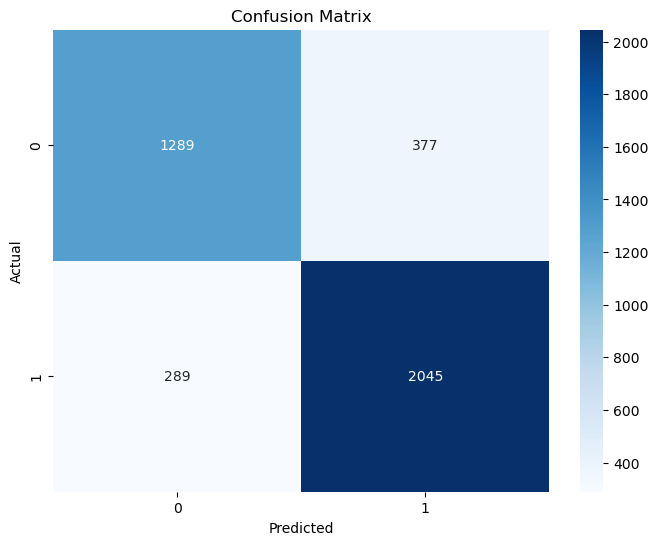

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "group5.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

# Inspect the data
print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n", df.info())
print("\nDataset Summary:\n", df.describe())

# Drop unnecessary columns (e.g., 'id')
df.drop(columns=['id'], inplace=True)

# Handle missing values
# - Fill numerical columns with median
# - Fill categorical columns with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Define features (X) and target (y)
X = df.drop(columns=['Depression'])  # Features
y = df['Depression']  # Target variable

# Normalize numerical features
numerical_columns = ['Age', 'CGPA', 'Work_Study_Hours']  # Adjust based on your dataset
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# One-hot encode categorical variables
nominal_columns = ['Gender', 'City', 'Profession', 'Dietary_Habits', 'Degree', 
                   'Have_you_ever_had_suicidal_thoughts_', 'Family_History_of_Mental_Illness', 
                   'Sleep_Duration']  # Adjust based on your dataset
X = pd.get_dummies(X, columns=nominal_columns, drop_first=True)  # Avoid multicollinearity

# Print the final feature set shape
print("Final Feature Set Shape:", X.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,           # Number of trees
    random_state=42,            # For reproducibility
    use_label_encoder=False,    # Avoids warnings
    eval_metric='logloss'       # Suitable for binary classification
)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()